In [99]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import linear_model, datasets

In [160]:
all_results_sp = pd.read_csv("//Users/brianritz/projects/findball/temp/all_results_sp.csv")
all_results_res = pd.read_csv("//Users/brianritz/projects/findball/temp/all_results_res.csv")

In [158]:
fbyf=all_results_res[(all_results_res.pitch_no==641)]
fbyf

,Unnamed: 0,index,frame_id,vert_center,horz_center,vert_center_r,horz_center_r,distance_mm,pitch_no
0,0,0,28,270.841675,257.088898,271.250000,257.250000,9143.999707,641
1,1,1,29,270.500000,268.000000,270.500000,268.000000,9143.999707,641
2,2,2,30,274.683472,319.952209,274.500031,320.000031,9143.999707,641
3,3,3,31,276.468781,361.938751,276.606567,362.992371,9143.999707,641
4,4,4,32,278.850281,406.609436,278.923981,406.947296,9143.999707,641
5,5,5,33,280.913635,447.458710,281.000000,447.000000,9143.999707,641
6,6,6,34,282.865997,486.812958,282.937775,486.503906,9143.999707,641
7,7,7,35,285.137543,526.953186,285.225433,526.479553,9143.999707,641
8,8,8,36,286.457764,565.083435,286.675690,565.945923,9143.999707,641
9,9,9,37,289.027283,609.453369,289.000000,606.500000,9143.999707,641


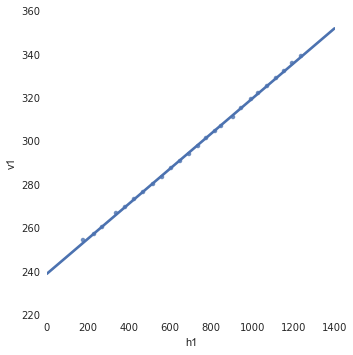

In [176]:
fbyf=all_results_sp[(all_results_sp.pitch_no==647)&(all_results_sp.fd==1)]
sns.lmplot("h1", "v1", fbyf)
fbyf.set_index('frame1', inplace=True)



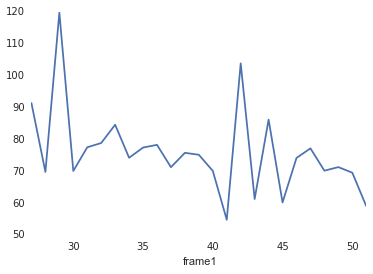

In [177]:
fbyf.velo.plot()

In [154]:
# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(pd.DataFrame(np.column_stack([fbyf.h1])), fbyf.v1)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [155]:
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [156]:
inlier_mask

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

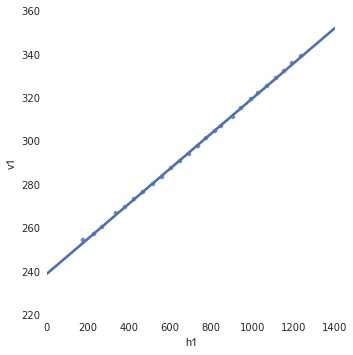

In [138]:
sns.lmplot("h1", "v1", fbyf[inlier_mask])

In [43]:
#!/opt/local/bin/python
#Andrew Samuels
#baseball.py

from scipy import *
from pdb import *


#create arrays
dt = 1./120.
nMAX = int(1/dt)

x = zeros(nMAX)
y = zeros(nMAX)
z = zeros(nMAX)
vx = zeros(nMAX)
vy = zeros(nMAX)
vz = zeros(nMAX)
v = zeros(nMAX)
va=zeros(nMAX)

#constants
B = 4.1e-4 #magnus force (dimensionless)
w = 1800/60.0 * 2*pi #rotaton rate of baseball, 1800 rpm to rad/s
g = 9.81 #acceleration of gravity (m/s^2)
v0_fb = 33.975 #initial speed of pitch, fastball (m/s)
v0_op = 38.0 #initial speed of pitch, other pitches (m/s)
l = 18.44 #distance from pitcher (m)
T_fb = l/v0_fb #step-length, estimated flight time, fastball
T_op = l/v0_op  #step-length, estimated flight time, other pitches
nT_fb = int(T_fb/dt) #number of iterations for fastball
nT_op = int(T_op/dt) #number of iterations for other pitches
d2r = pi/180 # convert degrees to radians
theta = 1 * d2r # elevation angle of pitch, degrees
phi1 = 225 * d2r #direction of w, relative to z, fastball
phi2 = 45 * d2r #direction of w, relative to z, curveball
phi3 = 0 * d2r #direction of w, relative to z, slider
phi4 = 135 * d2r #direction of w, relative to z, screwball
#drag force constants
c1 = 0.0039
c2 = 0.0058
vd = 35.0 #(m/s)
delta = 5.0 # (m/s)

#initial conditions
x[0] = 0.0
y[0] = 0.0
z[0] = 0.0
vx[0] = v0_fb * cos(theta) 
vy[0] = 0.0
vz[0] = v0_fb * sin(theta)


#pass dx/dt=vx through runkut4
def rk4dx(vx,dt):
    def dxdt(vx):
        dxdt = vx
        return dxdt
    K0 = dt * dxdt(vx)
    K1 = dt * dxdt(vx + K0/2.0)
    K2 = dt * dxdt(vx + K1/2.0)
    K3 = dt * dxdt(vx + K2)
    vxnew = (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
    return vxnew

#pass dy/dt=vy through runkut4
def rk4dy(vy,dt):
    def dydt(vy):
        dydt = vy
        return dydt
    K0 = dt * dydt(vy)
    K1 = dt * dydt(vy + K0/2.0)
    K2 = dt * dydt(vy + K1/2.0)
    K3 = dt * dydt(vy + K2)
    vynew = (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
    return vynew
    
#pass dz/dt=vz through runkut4
def rk4dz(vz,dt):
    def dzdt(vz):
        dzdt = vz
        return dzdt
    K0 = dt * dzdt(vz)
    K1 = dt * dzdt(vz + K0/2.0)
    K2 = dt * dzdt(vz + K1/2.0)
    K3 = dt * dzdt(vz + K2)
    vznew = (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
    return vznew

#solve accelerations with runge kutta 4
def rk4(v,vx,vy,vz,dt,phi):
    def ax(v,vx,vy,vz,phi):
    #drag force function, Fd(v)
        def Fd(v):
            return c1 + (c2/(1.0 + exp((v-vd)/delta)))
        return -Fd(v)*v*vx + B*w*(vz*sin(phi)-vy*cos(phi))
    def ay(v,vx,vy,phi):
    #drag force function, Fd(v)
        def Fd(v):
            return c1 + (c2/(1.0 + exp((v-vd)/delta)))
        return -Fd(v)*v*vy + B*w*vx*cos(phi1)
    def az(v,vx,vz,phi):
    #drag force function, Fd(v)
        def Fd(v):
            return c1 + (c2/(1.0 + exp((v-vd)/delta)))
        return -g*-Fd(v)*v*vz - B*w*vx*sin(phi)
    K0 = dt * ax(v,vx,vy,vz,phi)
    L0 = dt * ay(v,vx,vy,phi)
    M0 = dt * az(v,vx,vz,phi)
    K1 = dt * ax(v + dt/2.0,vx + K0/2.0,vy + L0/2.0,vz + M0/2.0,phi)
    L1 = dt * ay(v + dt/2.0,vx + K0/2.0,vy + L0/2.0,phi)
    M1 = dt * az(v + dt/2.0,vx + K0/2.0,vz + M0/2.0,phi)
    K2 = dt * ax(v + dt/2.0,vx + K1/2.0,vy + L1/2.0,vz + M1/2.0,phi)
    L2 = dt * ay(v + dt/2.0,vx + K1/2.0,vy + L1/2.0,phi)
    M2 = dt * az(v + dt/2.0,vx + K1/2.0,vz + M1/2.0,phi)
    K3 = dt * ax(v + dt,vx + K2,vy + L2,vz + M0,phi)
    L3 = dt * ay(v + dt,vx + K1,vy + L2,phi)
    M3 = dt * az(v + dt,vx + K1,vz + M2,phi)
    axnew = (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
    aynew = (L0 + 2.0*L1 + 2.0*L2 + L3)/6.0
    aznew = (M0 + 2.0*M1 + 2.0*M2 + M3)/6.0
    return axnew,aynew,aznew

In [44]:

for i in range(0,nT_fb):
    v = (vx[i] * vx[i] + vy[i] * vy[i] + vz[i] * vz[i])
    v = (v)**0.5
    va[i]=v
    print "X: " + str(x[i]) + " , Y: " + str(y[i]) + " , Z: " + str(z[i]) + " ,T: " + str(x[i]/v) +" , V: "+ str(v) + "\n"
    x[i+1] = x[i] + rk4dx(vx[i],dt) 
    y[i+1] = y[i] + rk4dy(vy[i],dt)
    z[i+1] = z[i] + rk4dz(vz[i],dt)
    vx[i+1] = vx[i] + rk4(v,vx[i],vy[i],vz[i],dt,phi1)[0]
    vy[i+1] = vy[i] + rk4(v,vx[i],vy[i],vz[i],dt,phi1)[1]
    vz[i+1] = vz[i] + rk4(v,vx[i],vy[i],vz[i],dt,phi1)[2]

X: 0.0 , Y: 0.0 , Z: 0.0 ,T: 0.0 , V: 33.975

X: 0.284264669756 , Y: 0.0 , Z: 0.00496185826738 ,T: 0.00838364566999 , V: 33.9070472376

X: 0.567956479859 , Y: -0.000129192512941 , Z: 0.0101530829996 ,T: 0.016783979164 , V: 33.8392031062

X: 0.851075994304 , Y: -0.000387057473104 , Z: 0.015578054501 ,T: 0.0252010347278 , V: 33.7714702391

X: 1.13362378505 , Y: -0.000773075745202 , Z: 0.0212412457045 ,T: 0.0336348440825 , V: 33.7038513475

X: 1.41560043202 , Y: -0.00128672914105 , Z: 0.0271472239664 ,T: 0.0420854362823 , V: 33.6363492236

X: 1.69700652304 , Y: -0.00192750043625 , Z: 0.0333006528926 ,T: 0.0505528375665 , V: 33.5689667431

X: 1.97784265384 , Y: -0.00269487338689 , Z: 0.039706294194 ,T: 0.0590370712028 , V: 33.501706869

X: 2.25810942801 , Y: -0.00358833274624 , Z: 0.0463690095733 ,T: 0.0675381573241 , V: 33.4345726546

X: 2.53780745696 , Y: -0.00460736428139 , Z: 0.053293762643 ,T: 0.0760561127568 , V: 33.367567247

X: 2.81693735984 , Y: -0.00575145478989 , Z: 0.0604856208

In [186]:
mph2mps=lambda x: x*0.44704
mps2mph=lambda x: x*(1./0.44704)

In [178]:
actuals=fbyf.velo.apply(mph2mps)  # this is "instantaneous" velo 1 frame to frame




In [208]:
# make a function that will generate velocities given a starting velocity
def gen_velos(start,frame_rate=120.):
    
    #create arrays
    dt = 1./frame_rate
    nMAX = int(1/dt)

    x = zeros(nMAX)
    y = zeros(nMAX)
    z = zeros(nMAX)
    vx = zeros(nMAX)
    vy = zeros(nMAX)
    vz = zeros(nMAX)
    v = zeros(nMAX)
    va=zeros(nMAX)
    
    B = 4.1e-4 #magnus force (dimensionless)
    w = 1800/60.0 * 2*pi #rotaton rate of baseball, 1800 rpm to rad/s
    g = 9.81 #acceleration of gravity (m/s^2)
    v0_fb = start #initial speed of pitch, fastball (m/s)
    v0_op = 38.0 #initial speed of pitch, other pitches (m/s)
    l = 18.44 #distance from pitcher (m)
    T_fb = l/v0_fb #step-length, estimated flight time, fastball
    T_op = l/v0_op  #step-length, estimated flight time, other pitches
    nT_fb = int(T_fb/dt) #number of iterations for fastball
    nT_op = int(T_op/dt) #number of iterations for other pitches
    d2r = pi/180 # convert degrees to radians
    theta = -1 * d2r # elevation angle of pitch, degrees
    phi1 = 225 * d2r #direction of w, relative to z, fastball
    phi2 = 45 * d2r #direction of w, relative to z, curveball
    phi3 = 0 * d2r #direction of w, relative to z, slider
    phi4 = 135 * d2r #direction of w, relative to z, screwball
    #drag force constants
    c1 = 0.0039
    c2 = 0.0058
    vd = 35.0 #(m/s)
    delta = 5.0 # (m/s)

    #initial conditions
    x[0] = 0.0
    y[0] = 0.0
    z[0] = 0.0
    vx[0] = v0_fb * cos(theta) 
    vy[0] = 0.0
    vz[0] = v0_fb * sin(theta)


    for i in range(0,nT_fb):
        v = (vx[i] * vx[i] + vy[i] * vy[i] + vz[i] * vz[i])
        v = (v)**0.5
        va[i]=v
        #print "X: " + str(x[i]) + " , Y: " + str(y[i]) + " , Z: " + str(z[i]) + " ,T: " + str(x[i]/v) +" , V: "+ str(v) + "\n"
        x[i+1] = x[i] + rk4dx(vx[i],dt) 
        y[i+1] = y[i] + rk4dy(vy[i],dt)
        z[i+1] = z[i] + rk4dz(vz[i],dt)
        vx[i+1] = vx[i] + rk4(v,vx[i],vy[i],vz[i],dt,phi1)[0]
        vy[i+1] = vy[i] + rk4(v,vx[i],vy[i],vz[i],dt,phi1)[1]
        vz[i+1] = vz[i] + rk4(v,vx[i],vy[i],vz[i],dt,phi1)[2]
    return vx

In [209]:
test=mps2mph(gen_velos(mph2mps(82)))[0:len(fbyf.velo)]

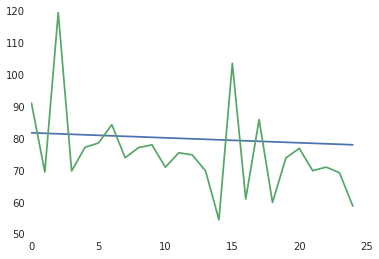

In [210]:
plt.plot(np.column_stack([test, fbyf.velo]))

In [207]:
vz

array([ 0.57592941,  0.60265909,  0.62990094,  0.65766561,  0.68596394,
        0.71480697,  0.74420595,  0.77417233,  0.80471778,  0.83585418,
        0.86759364,  0.89994847,  0.93293123,  0.9665547 ,  1.00083188,
        1.03577604,  1.07140065,  1.10771945,  1.14474642,  1.18249581,
        1.2209821 ,  1.26022005,  1.30022467,  1.34101125,  1.38259536,
        1.42499284,  1.4682198 ,  1.51229267,  1.55722815,  1.60304323,
        1.64975522,  1.69738174,  1.74594071,  1.79545037,  1.84592929,
        1.89739637,  1.94987085,  2.00337228,  2.0579206 ,  2.11353608,
        2.17023936,  2.22805143,  2.28699368,  2.34708786,  2.40835612,
        2.47082099,  2.53450542,  2.59943276,  2.6656268 ,  2.73311172,
        2.80191217,  2.87205324,  2.94356046,  3.01645985,  3.09077787,
        3.16654151,  3.24377821,  3.32251596,  3.40278324,  3.48460908,
        3.56802305,  3.65305526,  3.73973643,  3.82809784,  3.91817137,
        4.00998952,  4.10358544,  4.19899291,  0.        ,  0.  

In [211]:
drag_coefficient=lambda v:0.24+(0.26/(1+exp((v-83.9)/10.3)))

In [216]:
for x in fbyf.itertuples():
    print x
    

(27.0, 0, 3, 4, 28.0, 177.17655944824219, 229.64271545410159, 254.80378723144531, 257.87808227539057, 1.0, 91.305304681800976, 647)
(28.0, 25, 4, 5, 29.0, 229.64271545410159, 269.69747924804693, 257.87808227539057, 261.0384521484375, 1.0, 69.707801457591898, 647)
(29.0, 49, 5, 6, 30.0, 269.69747924804693, 338.47659301757812, 261.0384521484375, 267.22552490234369, 1.0, 119.68930506646394, 647)
(30.0, 72, 6, 7, 31.0, 338.47659301757812, 378.7061767578125, 267.22552490234369, 270.21377563476557, 1.0, 70.012022190985249, 647)
(31.0, 94, 7, 8, 32.0, 378.7061767578125, 423.20538330078125, 270.21377563476557, 273.623046875, 1.0, 77.441910583126315, 647)
(32.0, 115, 8, 9, 33.0, 423.20538330078125, 468.47515869140631, 273.623046875, 277.06268310546875, 1.0, 78.782816376359449, 647)
(33.0, 135, 9, 10, 34.0, 468.47515869140631, 517.03900146484386, 277.06268310546875, 280.61227416992193, 1.0, 84.514921978163571, 647)
(34.0, 154, 10, 11, 35.0, 517.03900146484386, 559.65081787109386, 280.61227416992